# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
# чтение файла с данными каждого региона
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    geo_data_0 = pd.read_csv('C:/Users/Alexandra/datasets/geo_data_0.csv')
    
try:
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    geo_data_1 = pd.read_csv('C:/Users/Alexandra/datasets/geo_data_1.csv')
    
try:
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_2 = pd.read_csv('C:/Users/Alexandra/datasets/geo_data_2.csv')

### Исследование данных трех скважин

In [3]:
#Выводим первые 5 строчек датафрейма на экран.
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info() #Выводим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#Выводим первые 5 строчек датафрейма на экран.
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
geo_data_1.info() #Выводим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
#Выводим первые 5 строчек датафрейма на экран.
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
geo_data_2.info() #Выводим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Посчитаем количество полных дубликатов.
print(geo_data_0.duplicated().sum())
print(geo_data_1.duplicated().sum())
geo_data_2.duplicated().sum()

0
0


0

**Вывод:**

В датасетах по 10000 строк и 5 столбцов. Полных дубликатов нет.

Столбец **id (уникальный идентификатор скважины)** не имеет значимости для модели. Удаляем.

In [10]:
#Удаляем столбец id из трех датасетов
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

### Проверим признаки на мультиколлинеарность

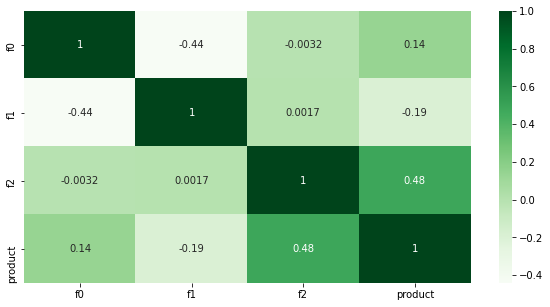

In [11]:
# Регион 0
import seaborn as sns 
plt.figure(figsize = (10,5))
df_plot = sns.heatmap(geo_data_0.corr(), cmap="Greens", annot=True) 


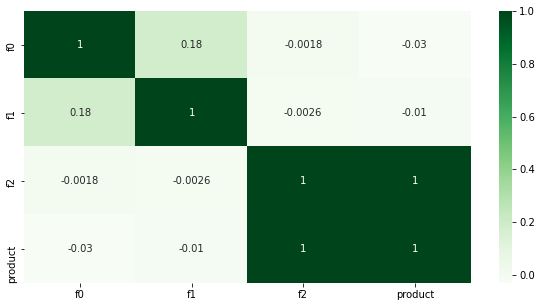

In [12]:
# Регион 1
import seaborn as sns 
plt.figure(figsize = (10,5))
df_plot = sns.heatmap(geo_data_1.corr(), cmap="Greens", annot=True) 


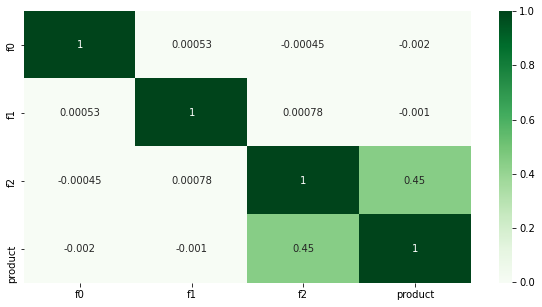

In [13]:
# Регион 2
import seaborn as sns 
plt.figure(figsize = (10,5))
df_plot = sns.heatmap(geo_data_2.corr(), cmap="Greens", annot=True) 


**Вывод:**

На данных по корреляции значений второго регоина, мы видим сильную зависимость целевого показателя **product** от **f2**, такая зависмость может дать нам высокие баллы предсказаний для нашей модели.

Судя по графику ниже в регионе 1 распределение сырья не является нормальным. Имеется нулевой объем сырья. Возможно поэтому наблюдается прямая зависимость объемов запасов в скважинах от f2.

### Гистограммы распределений признаков скважин по регионам

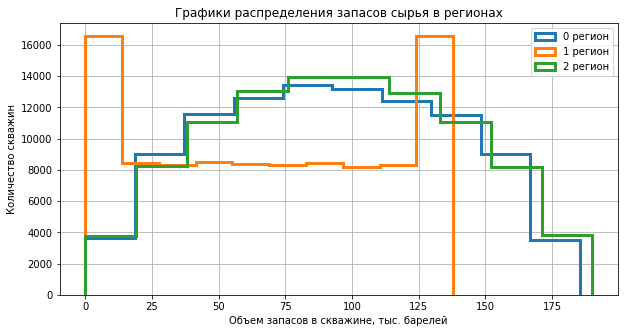

In [14]:
geo_data_0['product'].plot(kind='hist',figsize=(10,5),grid=True, legend=True, histtype='step', linewidth=3, label='0 регион')
geo_data_1['product'].plot(kind='hist',figsize=(10,5),grid=True, legend=True,histtype='step', linewidth=3, label='1 регион')
geo_data_2['product'].plot(kind='hist',figsize=(10,5),grid=True, legend=True,histtype='step', linewidth=3, label='2 регион')

plt.title('Графики распределения запасов сырья в регионах')
plt.xlabel('Объем запасов в скважине, тыс. барелей')
plt.ylabel('Количество скважин');

**Вывод:**

Для регионов 0 и 2 видно нормальное распределение.

Для региона 1 распределение отличается. Похоже, что были утеряны данные для этого региона.

## Обучение и проверка модели

Целевой признак - product (объём запасов в скважине). 

In [15]:
# Зададим RandomState
RANDOMSTATE = 111111

# Функция с масштабированием параметров
def split_scaler(df, features_df, target_df):
    # Разбиваем выборку в соотношении 75:25. 
    train, valid = np.split(df.sample(frac=1, random_state=RANDOMSTATE), [int(.75*len(df))])
    # Проверяем сколько строк и столбцов в полученных датасетах
    print('Проверяем размер выборок')
    print(train.shape)
    print(valid.shape)
    
    # Масштабируем данные
    scaler = StandardScaler()
    scaler.fit(train[features_df])
    train[features_df] = scaler.transform(train[features_df])
    
    valid[features_df] = scaler.transform(valid[features_df])  
    
    # Разбиваем на целевой признак и признаки модели.
    target_train = train[target_df]
    features_train = train[features_df]

    target_valid = valid[target_df]
    features_valid = valid[features_df]
    
    # Обучение модели
    model = LinearRegression()

    model.fit(features_train, target_train)
    
    predicted_target = model.predict(features_valid) #предсказание на валидационной выборке
    predicted_target = pd.Series(predicted_target, index = features_valid.index)
    print('С МАСШТАБИРОВАНИЕМ')
    print('Средний запас предсказанного сырья :', predicted_target.mean())
    print('RMSE :', mean_squared_error(target_valid, predicted_target)**0.5)


In [16]:
# Функция без масштабирования параметров
def split(df, features_df, target_df):
    # Разбиваем выборку в соотношении 75:25. 
    train, valid = np.split(df.sample(frac=1, random_state=RANDOMSTATE), [int(.25*len(df))])
    # Проверяем сколько строк и столбцов в полученных датасетах
    #print(train.shape)
    #print(valid.shape)
    
    # Разбиваем на целевой признак и признаки модели.
    target_train = train[target_df]
    features_train = train[features_df]

    target_valid = valid[target_df]
    features_valid = valid[features_df]
    
    model = LinearRegression()

    model.fit(features_train, target_train)

    predicted_target= model.predict(features_valid) #предсказание на валидационной выборке
    mean_predicted_target = predicted_target.mean()
    predicted_target = pd.Series(predicted_target, index = features_valid.index)
    print('')
    print('БЕЗ МАСШТАБИРОВАНИЯ')
    print('Средний запас предсказанного сырья :', predicted_target.mean())
    print('RMSE :', mean_squared_error(target_valid, predicted_target)**0.5)
    
    return target_valid, predicted_target

### Обучение для 0 региона

In [17]:
split_scaler(geo_data_0, ['f0', 'f1', 'f2'], 'product')
target_valid_0, predicted_target_0 = split(geo_data_0, ['f0', 'f1', 'f2'], 'product') # Предсказания объемов запасов в скважинах

Проверяем размер выборок
(75000, 4)
(25000, 4)
С МАСШТАБИРОВАНИЕМ
Средний запас предсказанного сырья : 92.5124174697973
RMSE : 37.784455982502216

БЕЗ МАСШТАБИРОВАНИЯ
Средний запас предсказанного сырья : 92.58503713239011
RMSE : 37.716680536302114


### Обучение для 1 региона

In [18]:
split_scaler(geo_data_1, ['f0', 'f1', 'f2'], 'product')
target_valid_1, predicted_target_1 = split(geo_data_1, ['f0', 'f1', 'f2'], 'product') # Предсказания объемов запасов в скважинах

Проверяем размер выборок
(75000, 4)
(25000, 4)
С МАСШТАБИРОВАНИЕМ
Средний запас предсказанного сырья : 68.08768102907578
RMSE : 0.8918792227904403

БЕЗ МАСШТАБИРОВАНИЯ
Средний запас предсказанного сырья : 68.74247629462434
RMSE : 0.8918203438850837


### Обучение для 2 региона

In [19]:
split_scaler(geo_data_2, ['f0', 'f1', 'f2'], 'product')
target_valid_2, predicted_target_2 = split(geo_data_2, ['f0', 'f1', 'f2'], 'product') # Предсказания объемов запасов в скважинах

Проверяем размер выборок
(75000, 4)
(25000, 4)
С МАСШТАБИРОВАНИЕМ
Средний запас предсказанного сырья : 94.7755776932722
RMSE : 40.2302452106027

БЕЗ МАСШТАБИРОВАНИЯ
Средний запас предсказанного сырья : 95.21029578582451
RMSE : 40.023677080597245


**Вывод:**

Масштабирование почти не влияет на качество модели. Будем использовать данные без масштабирования.


|ПОКАЗАТЕЛИ   	|Регион 0   	|Регион 1   	|Регион 2   	|    
|:---	|:---:	|:---:	|:---:	|
|Средний запас предсказанного сырья  	|92.58503713239011  	|68.74247629462434  	|95.21029578582451|  
|RMSE   	|37.716680536302114  	|0.8918203438850837 	|40.023677080597245 |

RMSE (среднеквадратичная ошибка в предсказании модели) для региона 1 сильно отличается от двух другий регионов. Модель для региона 1 лучше предсказала запасы. Возможно из-за потери данных для этого региона. Модель переобучилась.

Нужно выбирать между 1 и 3 регионом.

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [20]:
RESEARCH_POINTS = 500 # исследуют 500 точек
BEST_POINTS = 200 # лучших для разработки точек
BUDGET = 10_000_000 #Бюджет на разработку скважин в регионе, тыс.руб
REVENUE_PER_UNIT_OF_PRODUCT = 450 # Доход с каждой единицы продукта

# Средние значения объема запасов
product_mean_0 = geo_data_0['product'].mean()
product_mean_1 = geo_data_1['product'].mean()
product_mean_2 = geo_data_2['product'].mean()

In [21]:
# Бюджет расчитан на 200 лучших скважин. Поэтому для одной скважины бюджет:
budg_per_1_well=(BUDGET/BEST_POINTS)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_per_1_well/1000,'млн.руб')

# Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
v_prod=budg_per_1_well/REVENUE_PER_UNIT_OF_PRODUCT
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_prod,'тыс.баррелей')
print('')
print('Среднее значение объема запасов региона 0: ', product_mean_0)
print('Среднее значение объема запасов региона 1: ', product_mean_1)
print('Среднее значение объема запасов региона 2: ', product_mean_2)

Бюджет на разработку одной скважины: 50.0 млн.руб
Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей

Среднее значение объема запасов региона 0:  92.50000000000001
Среднее значение объема запасов региона 1:  68.82500000000002
Среднее значение объема запасов региона 2:  95.00000000000004


**Вывод:**

Среднее значения объема запасов регионов меньше, чем объем для безубыточной разработки скважен. Необходимо выбрать скважины с максимальными запасами.

## Расчёт прибыли и рисков 

In [22]:
# Задаем параметр для вывода на печать
def profit_for_region(target, predicted_target, NOT_PRINT):    
    probs_sorted = predicted_target.sort_values(ascending=False) #Сортируем самые прибыльные скважины
    selected_max = target[probs_sorted.index][:BEST_POINTS] #Выбираем 200 лучших скважин
    profit = sum(selected_max) * REVENUE_PER_UNIT_OF_PRODUCT - BUDGET # прибыль
    if NOT_PRINT == 0:
        print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%sum(selected_max))
        print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit/1000))        
    return profit

### Для региона 0

In [23]:
profit_0 = profit_for_region(target_valid_0, predicted_target_0, 0)

Суммарный запас сырья в 200 лучших скважинах составит: 30183.55 тыс.баррелей
Прибыль для полученного объёма сырья составит 3582.60 млн.рублей


### Для региона 1

In [24]:
profit_1 = profit_for_region(target_valid_1, predicted_target_1, 0)

Суммарный запас сырья в 200 лучших скважинах составит: 27589.08 тыс.баррелей
Прибыль для полученного объёма сырья составит 2415.09 млн.рублей


### Для региона 2

In [25]:
profit_2 = profit_for_region(target_valid_2, predicted_target_2, 0)

Суммарный запас сырья в 200 лучших скважинах составит: 27789.23 тыс.баррелей
Прибыль для полученного объёма сырья составит 2505.15 млн.рублей


**Вывод:**

Cуммарный запас сырья в 200 лучших скважинах и прибыль получились для **региона 0**. 30183.55 тыс.баррелей и 3582.60 млн.рублей соответственно.

## Посчитайте риски и прибыль для каждого региона:

In [26]:
# Функция для применения техники Bootstrap с 1000 выборокам
state = np.random.RandomState(RANDOMSTATE)
def bootstrap_1000(target_valid, predicted_target):
    predict = pd.Series(predicted_target, index=target_valid.index)
    values=[]

    for i in range(1000):
        target_subsample = target_valid.sample(replace=True, random_state=state, n=RESEARCH_POINTS)
        probs_subsample = predict[target_subsample.index]
        
        profit = profit_for_region(target_valid, probs_subsample, 1)
        values.append(profit)
        
    values = pd.Series(values) 

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = (values < 0).mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((lower/1000),(upper/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.2%}'.format(risk))
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(10,4))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество скважин');

### Bootstrap для региона 0

Средняя прибыль: 426.71 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -85.23 млн.руб до: 928.10 млн.руб
95%-ый доверительный интервал: от 410.32 млн.руб до 443.09 млн.руб
Процент вероятности убытка в данном регионе составит 5.50%


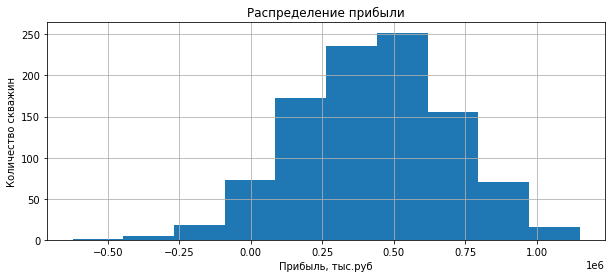

In [27]:
bootstrap_1000(target_valid_0, predicted_target_0)

### Bootstrap для региона 1

Средняя прибыль: 446.20 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 65.27 млн.руб до: 851.60 млн.руб
95%-ый доверительный интервал: от 433.48 млн.руб до 458.91 млн.руб
Процент вероятности убытка в данном регионе составит 1.30%


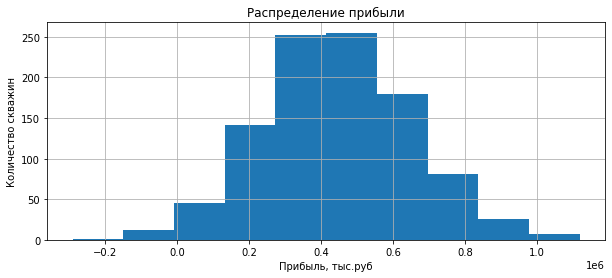

In [28]:
bootstrap_1000(target_valid_1, predicted_target_1)

### Bootstrap для региона 2

Средняя прибыль: 362.24 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -147.35 млн.руб до: 873.06 млн.руб
95%-ый доверительный интервал: от 345.84 млн.руб до 378.64 млн.руб
Процент вероятности убытка в данном регионе составит 8.20%


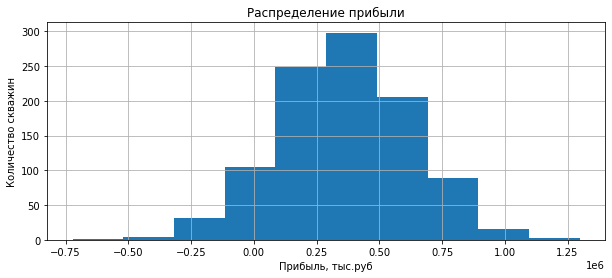

In [29]:
bootstrap_1000(target_valid_2, predicted_target_2)

**Вывод:**

Наиболее выгодный для разработки скважин **регион 2**. У него минимальные риски 1.30% и максимальная средняя прибыль: 446.20 млн.руб.

## Общие выводы

При исследовании датасетов было выявлено, что они состоят из 10000 строк. Полных дубликатов нет. В регионе 1 наблюдается сильная корреляция между столбцами f2 и product.

Для обучения модели был удален столбец id, не имеющий для нее значения.

Построены гистограммы распределения f0, f1, f2.

Обучение модели проводилось с помощью линейной регрессии.

Лучшее RMSE было выявлено в регионе 1.

Расчет прибыли и рисков показал, что суммарный запас сырья в 200 лучших скважинах и прибыль получились для **региона 0**. 30183.55 тыс.баррелей и 3582.60 млн.рублей соответственно.

С помощи техники Bootstrap с 1000 выборок было найдено распределение прибыли в трех регионах. Наиболее выгодный для разработки скважин оказался **регион 1**. У него минимальные риски 1.30% и максимальная средняя прибыль: 446.20 млн.руб.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован